In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [306]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import *
from sklearn.datasets.mldata import fetch_mldata
import tempfile
from sklearn import preprocessing
from sklearn.linear_model import Ridge
from sklearn import linear_model as lm

In [3]:
def vanilla_ridge_regression(X_train, y_train, lam):
    inv = np.linalg.inv(np.dot(X_train.T,X_train)+lam*np.eye(X_train.shape[1]))
    w = np.dot(np.dot(inv,X_train.T),y_train)
    return w

In [200]:
def anytime_regression_l2(X_train, y_train, lam, p):
    dp = np.diag(p) #B
    dpp = np.diag(p-1.0/2*p*p)
    #dpp = np.diag(p)
    xp = np.dot(X_train,dp)
    inv = np.linalg.inv(np.dot(np.dot(dpp,X_train.T),X_train) + 1.0/2*np.dot(xp.T,xp)+lam*np.eye(X_train.shape[1]))
    #inv = np.linalg.inv(np.dot(np.dot(X_train.T,X_train),dpp) +lam*np.eye(X_train.shape[1]))
    w = np.dot(np.dot(inv,xp.T),y_train)
    return w 

In [62]:
def simulate_regression(X_train, y_train, lam, p):
    dp = np.diag(p) #B
    xp = np.dot(X_train,dp)
    inv = np.linalg.inv(np.dot(xp.T,xp)+lam*np.eye(X_train.shape[1]))
    #dp2 = np.diag(p**2)
    #inv = np.linalg.inv(np.dot(np.dot(X_train.T,X_train),dp2)+lam*np.eye(X_train.shape[1]))
    w = np.dot(np.dot(inv,xp.T),y_train)
    return w 

In [6]:
def vanilla_lasso_regression(X_train,y_train,lam):
    clf = lm.Lasso(alpha=lam)
    clf.fit(X_train,y_train)
    w = clf.coef_
    return w

In [24]:
def prediction_error(X_test,y_test,w):
    dif = np.dot(X_test, w) - y_test
    error = 1.0/X_test.shape[0]*np.sum(np.power(dif,2))
    return error

In [15]:
def modify_data(X,p):
    XX = np.array(X)
    num = X.shape[0] - (p*X.shape[0]).astype('int32')
    for i in range(num.shape[0]):
        perm = np.random.permutation(X.shape[0])[0:num[i]]
        XX[perm, i] = 0
    return XX

In [13]:
def generate_synthetic_data(n=1000,d=2, sigma=np.array([0.1,0.1]),w = np.array([0.5,0.5]),p = np.array([0.9,0.1]),noise = 0.01):
    x = np.random.rand(n)
    X = np.zeros((n,d))
    for i in range(d):
        x1 = x + np.random.normal(0,sigma[i],x.shape[0])
        X[:,i] = x1
    y = np.dot(X,w) + np.random.normal(0,noise,X.shape[0])
    X_train = np.array(X[0:n/2,:])
    y_train = np.array(y[0:n/2])
    X_test = np.array(X[n/2:,:])
    y_test = np.array(y[n/2])
    return x, X_train,y_train, X_test, y_test

In [126]:
def plot(error,lam,label='exp'):
    fig, ax = plt.subplots()
    ax.plot(lam, error, label=label)
    ax.set_xscale('log')
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.plot()

In [232]:
lam = np.logspace(-4,8,13)
#lam = np.linspace(0.01,10,10)
lam

array([  1.00000000e-04,   1.00000000e-03,   1.00000000e-02,
         1.00000000e-01,   1.00000000e+00,   1.00000000e+01,
         1.00000000e+02,   1.00000000e+03,   1.00000000e+04,
         1.00000000e+05,   1.00000000e+06,   1.00000000e+07,
         1.00000000e+08])

# Synthetic Exp1

In [1262]:
n=10000
d = 2
#p = np.random.rand(d)
#sigma= np.random.rand(d)
#w = np.random.rand(d)
sigma = np.array([1,1])
w = np.array([0.8,0.2])
p = np.array([0.05,0.5])
noise = 1
x, X_train, y_train, X_test, y_test = generate_synthetic_data(n,d,sigma, w,p,noise)
X_test = modify_data(X_test,p)
X_train_mod = modify_data(X_train,p)

In [1263]:
print 'p'
print p
print 'w'
print w
print 'sigma'
print sigma

p
[ 0.05  0.5 ]
w
[ 0.8  0.2]
sigma
[1 1]


In [1264]:
error_total = []

weight
[ 0.80780407  0.20398162]
[ 0.80780396  0.20398161]
[ 0.80780284  0.20398161]
[ 0.80779172  0.20398151]
[ 0.8076805  0.2039806]
[ 0.80657009  0.20397106]
[ 0.79564176  0.20383512]
[ 0.70137242  0.19949794]
[ 0.3262962   0.12739823]
[ 0.05216204  0.0239419 ]
[ 0.00555427  0.00260934]
[ 0.00055906  0.00026328]
[  5.59425389e-05   2.63516038e-05]
error
[ 0.76544981  0.7654498   0.76544971  0.76544882  0.76543999  0.76535194
  0.76450219  0.75845333  0.76082762  0.80006674  0.81101917  0.812277
  0.81240461]


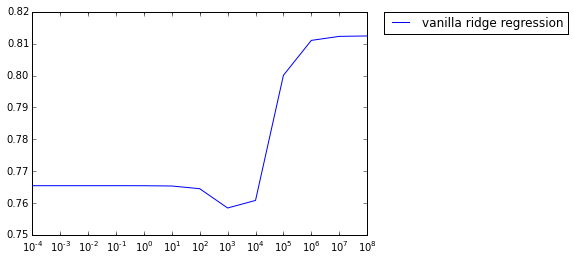

In [1265]:
# vanilla ridge regreesion on unmodified training data
error = np.zeros(lam.shape[0],)
print 'weight'
for i in range(lam.shape[0]):
    w_vrr = vanilla_ridge_regression(X_train,y_train,lam[i])
    print  w_vrr
    error[i] = prediction_error(X_test,y_test,w_vrr)
print 'error'
print error
plot(error,lam, label = 'vanilla ridge regression')
error_total.append(error)

weight
[ 0.86518937  0.39403334]
[ 0.86518734  0.39403327]
[ 0.86516704  0.39403257]
[ 0.8649641   0.39402557]
[ 0.86294     0.39395543]
[ 0.84321201  0.39324669]
[ 0.68656103  0.3856381 ]
[ 0.24256741  0.31118107]
[ 0.03350817  0.10153976]
[ 0.00351906  0.01308971]
[ 0.00035383  0.00134789]
[  3.54023330e-05   1.35191305e-04]
[  3.54042891e-06   1.35231630e-05]
error
[ 0.76552678  0.76552659  0.76552466  0.7655054   0.76531364  0.76347602
  0.75088996  0.73541254  0.7733902   0.80662531  0.81181176  0.81235781
  0.81241271]


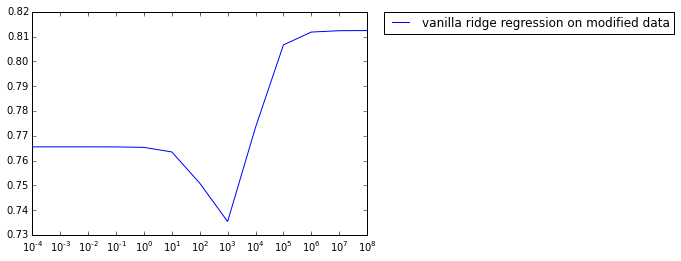

In [1266]:
# vanilla ridge regression on modified training data
error = np.zeros(lam.shape[0],)
print 'weight'
for i in range(lam.shape[0]):
    w_vrr = vanilla_ridge_regression(X_train_mod,y_train,lam[i])
    print  w_vrr
    error[i] = prediction_error(X_test,y_test,w_vrr)
print 'error'
print error
plot(error,lam,label='vanilla ridge regression on modified data')
error_total.append(error)

weight
[ 16.15597634   0.40796575]
[ 16.15502915   0.40798845]
[ 16.14556341   0.40821528]
[ 16.05151329   0.41046871]
[ 15.16802299   0.43161084]
[ 9.78588762  0.55872334]
[ 2.16358873  0.70388167]
[ 0.25586368  0.49351112]
[ 0.02747741  0.11302016]
[ 0.0027917   0.01296221]
[ 0.00027968  0.00131553]
[  2.79727328e-05   1.31749335e-04]
[  2.79732471e-06   1.31768993e-05]
error 
[ 20.40390035  20.40156006  20.37818002  20.14664058  18.03911785
   7.83622326   1.11646546   0.75534257   0.77027626   0.80671281
   0.81182939   0.81235967   0.81241289]


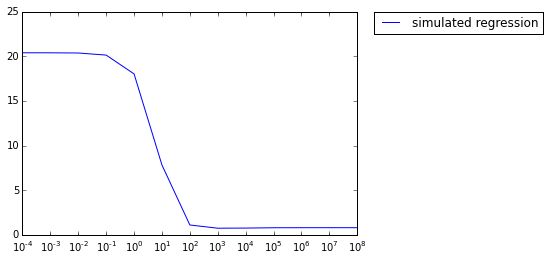

In [1267]:
# simulated regression 
error = np.zeros(lam.shape[0],)
print 'weight'
for i in range(lam.shape[0]):
    w_vrr = simulate_regression(X_train,y_train,lam[i],p)
    print  w_vrr
    error[i] = prediction_error(X_test,y_test,w_vrr)
print 'error '
print error
plot(error,lam,label='simulated regression')
error_total.append(error)

weight
[ 0.78192816  0.25281605]
[ 0.78192589  0.2528164 ]
[ 0.78190325  0.25281996]
[ 0.78167688  0.25285551]
[ 0.77942051  0.25320957]
[ 0.75756283  0.25660755]
[ 0.59221681  0.2799086 ]
[ 0.19035635  0.27913831]
[ 0.02616304  0.09786821]
[ 0.00277582  0.01273969]
[ 0.00027951  0.00131321]
[  2.79711040e-05   1.31725994e-04]
[  2.79730842e-06   1.31766658e-05]
error 
[ 0.75745818  0.75745797  0.75745591  0.7574353   0.75723044  0.75529779
  0.74368351  0.73713282  0.77480887  0.80680733  0.81183042  0.81235968
  0.81241289]


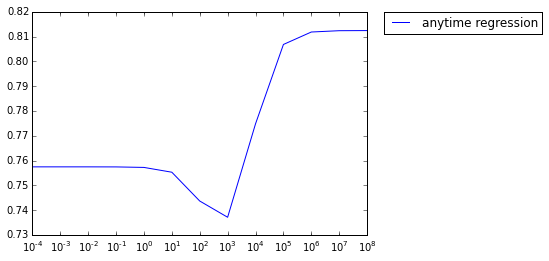

In [1268]:
# Anytime regression
error = np.zeros(lam.shape[0],)
print 'weight'
for i in range(lam.shape[0]):
    w_vrr = anytime_regression_l2(X_train,y_train,lam[i],p)
    print  w_vrr
    error[i] = prediction_error(X_test,y_test,w_vrr)
print 'error '
print error
plot(error,lam,label='anytime regression')
error_total.append(error)

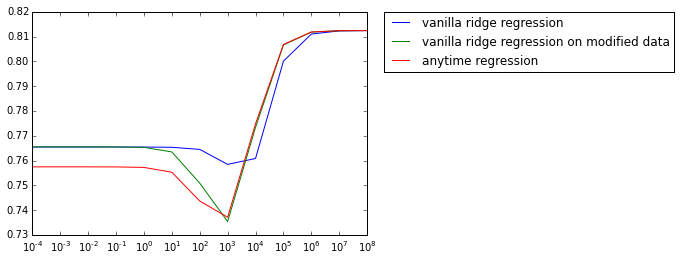

In [1269]:
fig, ax = plt.subplots()
ax.plot(lam,error_total[0], label='vanilla ridge regression')
ax.plot(lam,error_total[1], label='vanilla ridge regression on modified data')
#ax.plot(lam,error_total[2], label='simulated regression')
ax.plot(lam,error_total[3], label='anytime regression')
ax.set_xscale('log')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# Boston data

In [574]:
boston = load_boston()
X = boston.data 
X = preprocessing.normalize(X, norm='l2')
y = boston.target
X_train = np.array(X[0:X.shape[0]/2,:])
y_train = np.array(y[0:X.shape[0]/2])
X_test = np.array(X[X.shape[0]/2:,:])
y_test = np.array(y[X.shape[0]/2:])

In [575]:
p = np.random.rand(X.shape[1])
#w = np.random.rand(X.shape[1])
X_train_mod = modify_data(X_train,p)
X_test = modify_data(X_test,p)

In [576]:
print 'p'
print p

p
[ 0.01232839  0.9383033   0.89447763  0.08383472  0.44625041  0.59295115
  0.03963063  0.67555557  0.75606647  0.04447946  0.11150115  0.07014053
  0.48352382]


In [577]:
error_total = []

weight
error
[ 310.16691184  347.2998646   513.59650587  481.25070351  468.06711791
  477.29822969  488.28827566  512.45616524  522.6841764   524.03112628
  524.17004887  524.18398468  524.1853787 ]


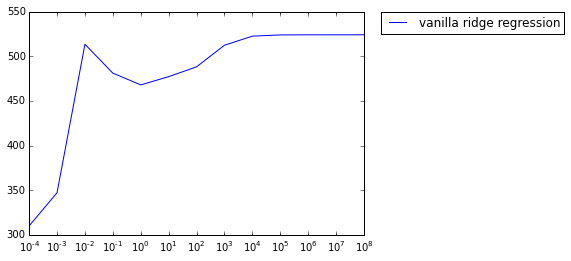

In [578]:
# vanilla ridge regreesion on unmodified training data
error = np.zeros(lam.shape[0],)
print 'weight'
for i in range(lam.shape[0]):
    w_vrr = vanilla_ridge_regression(X_train,y_train,lam[i])
    #print  w_vrr
    error[i] = prediction_error(X_test,y_test,w_vrr)
print 'error'
print error
plot(error,lam, label = 'vanilla ridge regression')
error_total.append(error)

weight
error
[ 333.1663818   310.6189715   198.62211057  162.17897761  323.78302987
  461.0160436   513.48767585  523.02259687  524.06820225  524.17378997
  524.18435913  524.18541615  524.18552185]


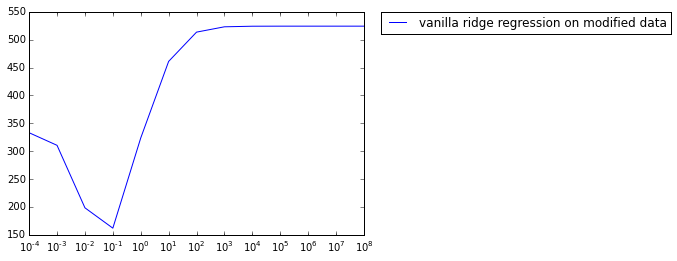

In [579]:
# vanilla ridge regression on modified training data
error = np.zeros(lam.shape[0],)
print 'weight'
for i in range(lam.shape[0]):
    w_vrr = vanilla_ridge_regression(X_train_mod,y_train,lam[i])
    #print  w_vrr
    error[i] = prediction_error(X_test,y_test,w_vrr)
print 'error'
print error
plot(error,lam,label='vanilla ridge regression on modified data')
error_total.append(error)

weight
error 
[ 2100.79376038  4653.17548662  4724.66811907  2861.2653896    927.98721004
   448.27390912   512.21896043   522.93583196   524.06002209   524.17297702
   524.18427789   524.18540803   524.18552104]


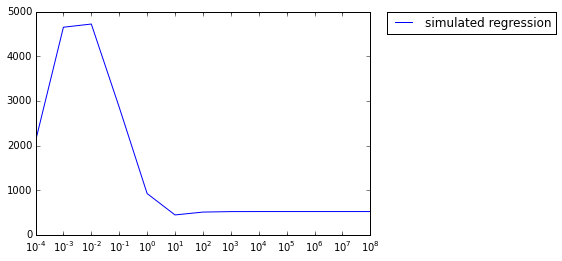

In [580]:
# simulated regression 
error = np.zeros(lam.shape[0],)
print 'weight'
for i in range(lam.shape[0]):
    w_vrr = simulate_regression(X_train,y_train,lam[i],p)
    #print  w_vrr
    error[i] = prediction_error(X_test,y_test,w_vrr)
print 'error '
print error
plot(error,lam,label='simulated regression')
error_total.append(error)

weight
error 
[ 1737.45483293  1452.97815797   398.55999278   197.9945282    386.69541812
   473.96659774   513.4321444    522.95072129   524.06017423   524.17297855
   524.1842779    524.18540803   524.18552104]


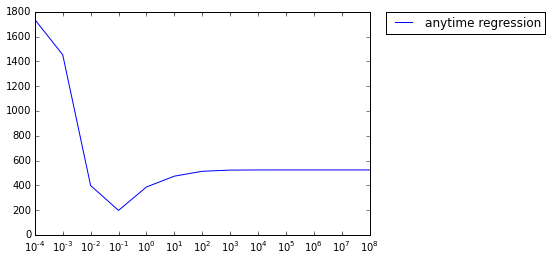

In [581]:
# Anytime regression
error = np.zeros(lam.shape[0],)
print 'weight'
for i in range(lam.shape[0]):
    w_vrr = anytime_regression_l2(X_train,y_train,lam[i],p)
    #print  w_vrr
    error[i] = prediction_error(X_test,y_test,w_vrr)
print 'error '
print error
plot(error,lam,label='anytime regression')
error_total.append(error)

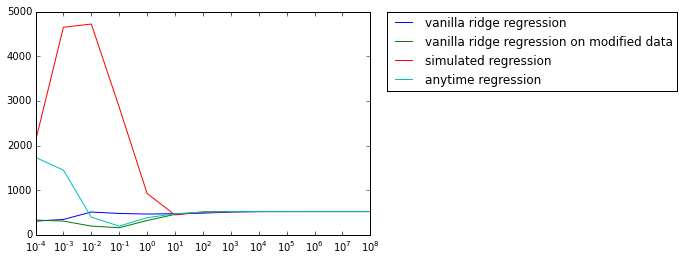

In [582]:
fig, ax = plt.subplots()
ax.plot(lam,error_total[0], label='vanilla ridge regression')
ax.plot(lam,error_total[1], label='vanilla ridge regression on modified data')
ax.plot(lam,error_total[2], label='simulated regression')
ax.plot(lam,error_total[3], label='anytime regression')
ax.set_xscale('log')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# diabetes

In [518]:
diabetes = load_diabetes()
X = diabetes.data 
X = preprocessing.normalize(X, norm='l2')
y = diabetes.target
X_train = np.array(X[0:X.shape[0]/2,:])
y_train = np.array(y[0:X.shape[0]/2])
X_test = np.array(X[X.shape[0]/2:,:])
y_test = np.array(y[X.shape[0]/2:])

In [519]:
p = np.random.rand(X.shape[1])
#w = np.random.rand(X.shape[1])
X_train_mod = modify_data(X_train,p)
X_test = modify_data(X_test,p)

In [491]:
X_train.shape

(221, 10)

In [520]:
print 'p'
print p

p
[ 0.94095008  0.21183089  0.82353849  0.54495014  0.3009365   0.31404127
  0.51676013  0.13316187  0.41188935  0.22044457]


In [521]:
error_total = []

weight
error
[ 66329.76967608  65850.62363104  61543.21528375  42082.59730857
  30038.54664082  29167.46217114  29924.62739752  30480.79449293
  30573.02593584  30582.87946285  30583.87158777  30583.9708685
  30583.98079725]


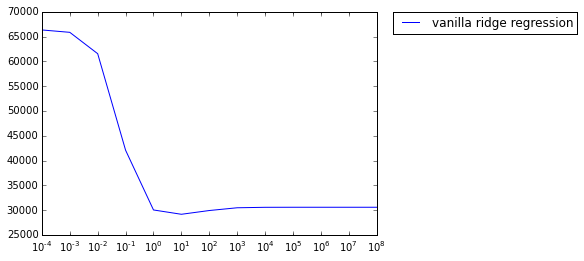

In [522]:
# vanilla ridge regreesion on unmodified training data
error = np.zeros(lam.shape[0],)
print 'weight'
for i in range(lam.shape[0]):
    w_vrr = vanilla_ridge_regression(X_train,y_train,lam[i])
    #print  w_vrr
    error[i] = prediction_error(X_test,y_test,w_vrr)
print 'error'
print error
plot(error,lam, label = 'vanilla ridge regression')
error_total.append(error)

weight
error
[ 29362.39152744  29362.07520779  29358.92558741  29328.7267831
  29117.29458143  28932.25793543  30003.33416397  30509.55235941
  30576.32703445  30583.21423224  30583.90511175  30583.97422136
  30583.98113254]


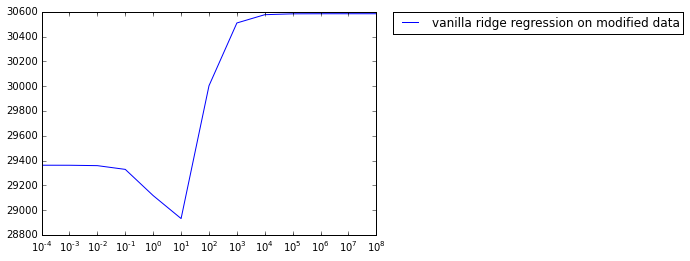

In [523]:
# vanilla ridge regression on modified training data
error = np.zeros(lam.shape[0],)
print 'weight'
for i in range(lam.shape[0]):
    w_vrr = vanilla_ridge_regression(X_train_mod,y_train,lam[i])
    #print  w_vrr
    error[i] = prediction_error(X_test,y_test,w_vrr)
print 'error'
print error
plot(error,lam,label='vanilla ridge regression on modified data')
error_total.append(error)

weight
error 
[ 367546.94322461  329716.24020979  155679.33585799   39346.61498579
   29687.54441801   28900.6891703    30025.8929835    30514.18218738
   30576.82590761   30583.2644955    30583.91014185   30583.97472441
   30583.98118285]


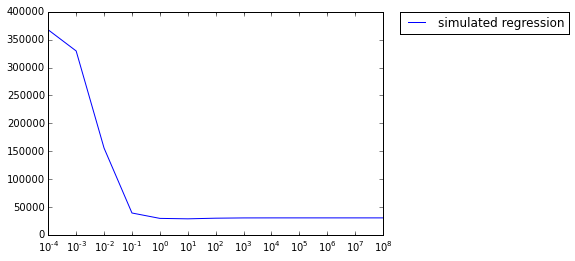

In [524]:
# simulated regression 
error = np.zeros(lam.shape[0],)
print 'weight'
for i in range(lam.shape[0]):
    w_vrr = simulate_regression(X_train,y_train,lam[i],p)
    #print  w_vrr
    error[i] = prediction_error(X_test,y_test,w_vrr)
print 'error '
print error
plot(error,lam,label='simulated regression')
error_total.append(error)

weight
error 
[ 50108.79067774  49432.1802811   44206.06806312  32147.16948632
  29080.64629511  29136.23760274  30063.72227801  30514.82717012
  30576.83276042  30583.26456446  30583.91014254  30583.97472442
  30583.98118285]


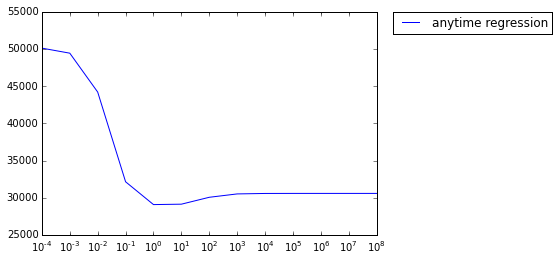

In [525]:
# Anytime regression
error = np.zeros(lam.shape[0],)
print 'weight'
for i in range(lam.shape[0]):
    w_vrr = anytime_regression_l2(X_train,y_train,lam[i],p)
    #print  w_vrr
    error[i] = prediction_error(X_test,y_test,w_vrr)
print 'error '
print error
plot(error,lam,label='anytime regression')
error_total.append(error)

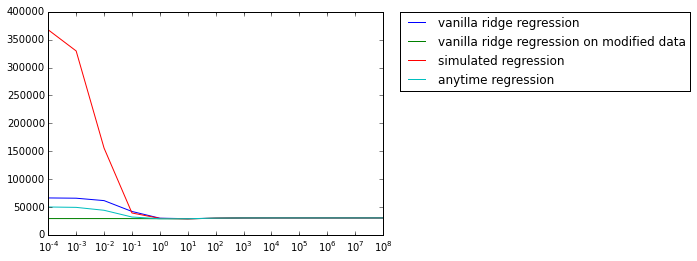

In [526]:
fig, ax = plt.subplots()
ax.plot(lam,error_total[0], label='vanilla ridge regression')
ax.plot(lam,error_total[1], label='vanilla ridge regression on modified data')
ax.plot(lam,error_total[2], label='simulated regression')
ax.plot(lam,error_total[3], label='anytime regression')
ax.set_xscale('log')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# UCI wine data

In [472]:
test_data_home = tempfile.mkdtemp()
lfw = fetch_mldata('uci-20070111-wine', data_home=test_data_home)
X = lfw.data
#X = preprocessing.normalize(X, norm='l2')
y = lfw.target
X_train = np.array(X[0:X.shape[0]/2,:])
y_train = np.array(y[0:X.shape[0]/2])
X_test = np.array(X[X.shape[0]/2:,:])
y_test = np.array(y[X.shape[0]/2:])

(178,)

In [473]:
p = np.random.rand(X.shape[1])
#w = np.random.rand(X.shape[1])
X_train_mod = modify_data(X_train,p)
X_test = modify_data(X_test,p)

In [474]:
print 'p'
print p

p
[ 0.98881815  0.35681094  0.86742498  0.10170941]


In [475]:
error_total = []

weight
error
[ 8.61067257  8.6100887   8.60426446  8.54743786  8.0928573   6.79656262
  6.0139923   4.94004547  4.73445043  5.86263215  6.57561936  6.6839619
  6.69535653]


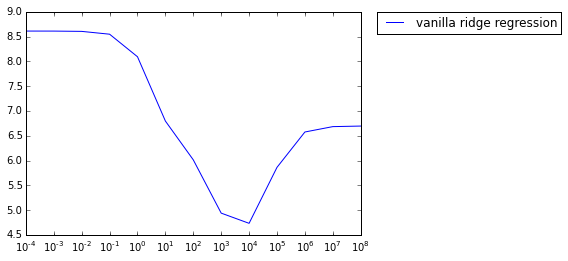

In [476]:
# vanilla ridge regreesion on unmodified training data
error = np.zeros(lam.shape[0],)
print 'weight'
for i in range(lam.shape[0]):
    w_vrr = vanilla_ridge_regression(X_train,y_train,lam[i])
    #print  w_vrr
    error[i] = prediction_error(X_test,y_test,w_vrr)
print 'error'
print error
plot(error,lam, label = 'vanilla ridge regression')
error_total.append(error)

weight
error
[ 1.96282004  1.96281963  1.96281545  1.96277381  1.96236481  1.9589377
  1.95362001  2.10586606  3.35577725  5.83230613  6.59447188  6.68622552
  6.69558693]


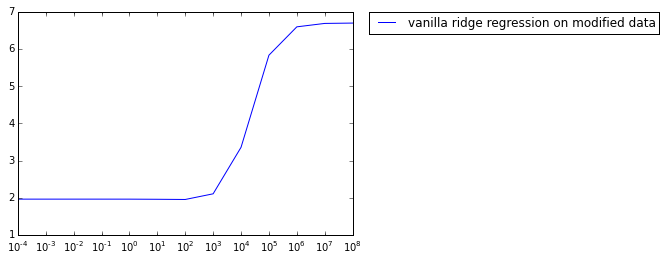

In [477]:
# vanilla ridge regression on modified training data
error = np.zeros(lam.shape[0],)
print 'weight'
for i in range(lam.shape[0]):
    w_vrr = vanilla_ridge_regression(X_train_mod,y_train,lam[i])
    #print  w_vrr
    error[i] = prediction_error(X_test,y_test,w_vrr)
print 'error'
print error
plot(error,lam,label='vanilla ridge regression on modified data')
error_total.append(error)

weight
error 
[ 48.06416541  48.0481821   47.88892481  46.35190222  35.04531316
   9.70745546   2.18173372   2.07895597   3.34115421   5.83275603
   6.59468253   6.68624889   6.69558929]


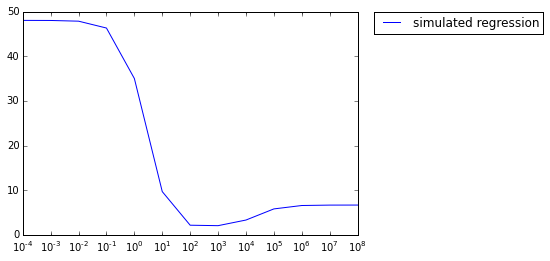

In [478]:
# simulated regression 
error = np.zeros(lam.shape[0],)
print 'weight'
for i in range(lam.shape[0]):
    w_vrr = simulate_regression(X_train,y_train,lam[i],p)
    #print  w_vrr
    error[i] = prediction_error(X_test,y_test,w_vrr)
print 'error '
print error
plot(error,lam,label='simulated regression')
error_total.append(error)

weight
error 
[ 1.45039826  1.45035271  1.44989766  1.44538561  1.4038353   1.18617546
  1.01641099  1.59446116  3.43892924  5.84508055  6.5948653   6.6862508
  6.69558931]


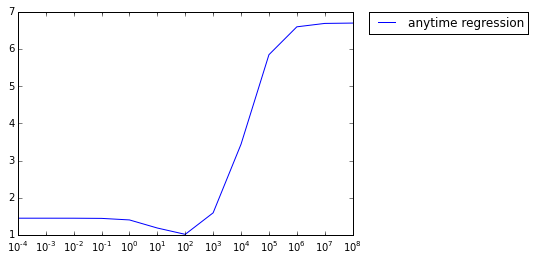

In [479]:
# Anytime regression
error = np.zeros(lam.shape[0],)
print 'weight'
for i in range(lam.shape[0]):
    w_vrr = anytime_regression_l2(X_train,y_train,lam[i],p)
    #print  w_vrr
    error[i] = prediction_error(X_test,y_test,w_vrr)
print 'error '
print error
plot(error,lam,label='anytime regression')
error_total.append(error)

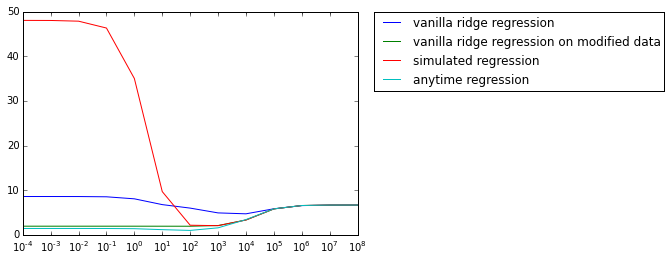

In [480]:
fig, ax = plt.subplots()
ax.plot(lam,error_total[0], label='vanilla ridge regression')
ax.plot(lam,error_total[1], label='vanilla ridge regression on modified data')
ax.plot(lam,error_total[2], label='simulated regression')
ax.plot(lam,error_total[3], label='anytime regression')
ax.set_xscale('log')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# uci-20070111-waveform-5000

In [352]:
test_data_home = tempfile.mkdtemp()
lfw = fetch_mldata('uci-20070111-waveform-5000', data_home=test_data_home)
y = lfw.data
#X = preprocessing.normalize(X, norm='l2')
X = lfw.target.T
X_train = np.array(X[0:X.shape[0]/2,:])
y_train = np.array(y[0:X.shape[0]/2])
X_test = np.array(X[X.shape[0]/2:,:])
y_test = np.array(y[X.shape[0]/2:])

In [378]:
p = np.random.rand(X.shape[1])
#w = np.random.rand(X.shape[1])
X_train_mod = modify_data(X_train,p)
X_test = modify_data(X_test,p)

In [379]:
print 'p'
print p

p
[ 0.6662083   0.38759031  0.14820603  0.83411194  0.96060229  0.10258851
  0.64274609  0.40366154  0.75678632  0.44887543  0.68378027  0.77585222
  0.20704031  0.67174225  0.97575888  0.98450196  0.72170009  0.075543
  0.10458043  0.0663226   0.68542624  0.62581219  0.1454867   0.4581796
  0.59053121  0.90835311  0.32062752  0.95058532  0.52354143  0.54820275
  0.76513605  0.32732644  0.59888251  0.52377814  0.40739937  0.5059711
  0.6854548   0.97506321  0.65611546  0.09851949]


In [380]:
error_total = []

weight
error
[ 1.17464636  1.17464635  1.17464624  1.17464517  1.17463445  1.17452806
  1.17354045  1.16871061  1.19566506  1.36733204  1.61314838  1.69057346
  1.70011478]


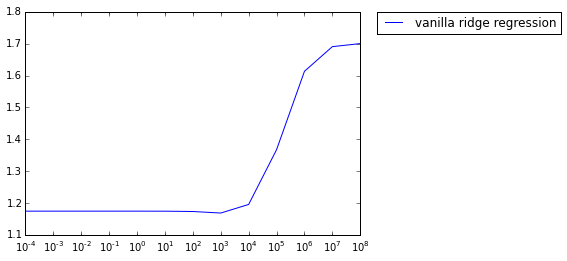

In [381]:
# vanilla ridge regreesion on unmodified training data
error = np.zeros(lam.shape[0],)
print 'weight'
for i in range(lam.shape[0]):
    w_vrr = vanilla_ridge_regression(X_train,y_train,lam[i])
    #print  w_vrr
    error[i] = prediction_error(X_test,y_test,w_vrr)
print 'error'
print error
plot(error,lam, label = 'vanilla ridge regression')
error_total.append(error)

weight
error
[ 1.0194215   1.0194215   1.01942152  1.01942172  1.01942364  1.01944304
  1.01965246  1.02296382  1.07321392  1.33558553  1.6288941   1.69318864
  1.70039013]


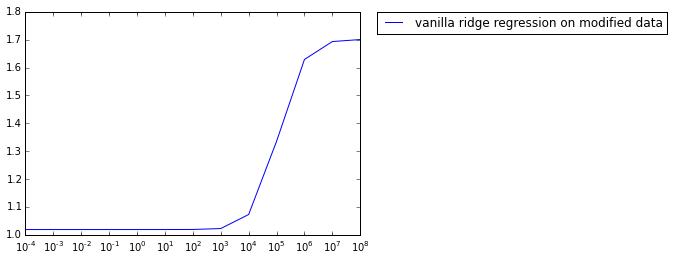

In [382]:
# vanilla ridge regression on modified training data
error = np.zeros(lam.shape[0],)
print 'weight'
for i in range(lam.shape[0]):
    w_vrr = vanilla_ridge_regression(X_train_mod,y_train,lam[i])
    #print  w_vrr
    error[i] = prediction_error(X_test,y_test,w_vrr)
print 'error'
print error
plot(error,lam,label='vanilla ridge regression on modified data')
error_total.append(error)

weight
error 
[ 1.04518491  1.04518314  1.04516543  1.04498923  1.04330604  1.0310609
  0.98989695  0.96551572  1.03609492  1.3277738   1.62855824  1.69317722
  1.70038927]


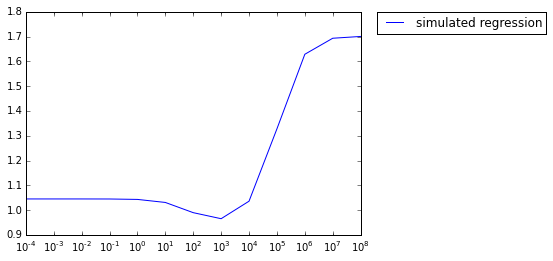

In [383]:
# simulated regression 
error = np.zeros(lam.shape[0],)
print 'weight'
for i in range(lam.shape[0]):
    w_vrr = simulate_regression(X_train,y_train,lam[i],p)
    #print  w_vrr
    error[i] = prediction_error(X_test,y_test,w_vrr)
print 'error '
print error
plot(error,lam,label='simulated regression')
error_total.append(error)

weight
error 
[ 0.93543181  0.93543178  0.93543154  0.93542911  0.93540478  0.93515449
  0.9323553   0.9268412   1.08114895  1.36781485  1.63048953  1.69320175
  1.70038952]


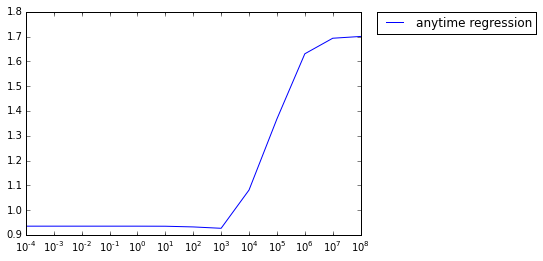

In [384]:
# Anytime regression
error = np.zeros(lam.shape[0],)
print 'weight'
for i in range(lam.shape[0]):
    w_vrr = anytime_regression_l2(X_train,y_train,lam[i],p)
    #print  w_vrr
    error[i] = prediction_error(X_test,y_test,w_vrr)
print 'error '
print error
plot(error,lam,label='anytime regression')
error_total.append(error)

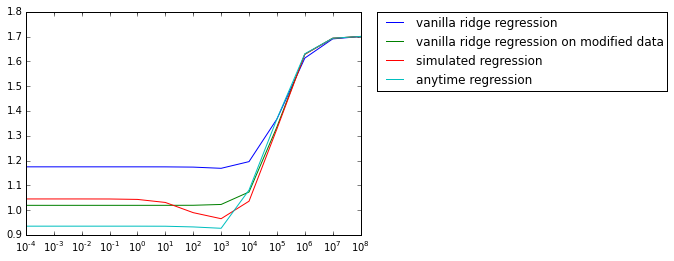

In [385]:
fig, ax = plt.subplots()
ax.plot(lam,error_total[0], label='vanilla ridge regression')
ax.plot(lam,error_total[1], label='vanilla ridge regression on modified data')
ax.plot(lam,error_total[2], label='simulated regression')
ax.plot(lam,error_total[3], label='anytime regression')
ax.set_xscale('log')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()